<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [25]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**1. Загрузить датасет**

In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [4]:
dataset1 = dataset.sort_values('Class', ascending = False).head(2000)

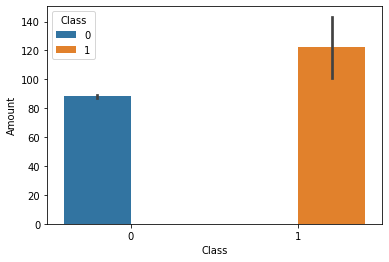

In [5]:
ax = sns.barplot(x="Class", y="Amount", hue="Class", data=dataset)

In [6]:
count_class_1 = len(dataset[dataset['Class'] == 0])
count_class_2 = len(dataset[dataset['Class'] == 1])
print('Записей класса 1:', count_class_1)
print('Записей класса 2:', count_class_2)

Записей класса 1: 284315
Записей класса 2: 492


**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

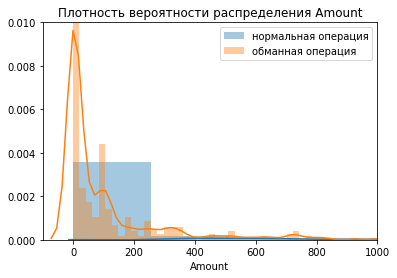

In [7]:
amount_reg = dataset[dataset['Class'] == 0]['Amount']
amount_fraud = dataset[dataset['Class'] == 1]['Amount']

sns.distplot(amount_reg, 100)
sns.distplot(amount_fraud, 100)
plt.title('Плотность вероятности распределения Amount')
plt.xlim(-100, 1000)
plt.ylim(0, 0.01)
plt.legend(['нормальная операция', 'обманная операция'])
plt.show()

In [8]:
sum_1 = dataset[dataset['Class'] == 0]['Amount'].sum()
sum_2 = dataset[dataset['Class'] == 1]['Amount'].sum()
print('Сумма по нормальным операциям:', sum_1)
print('Сумма по обманным операциям:', sum_2)

Сумма по нормальным операциям: 25102462.04
Сумма по обманным операциям: 60127.97


**5. Построить графики histograms для всех значений**

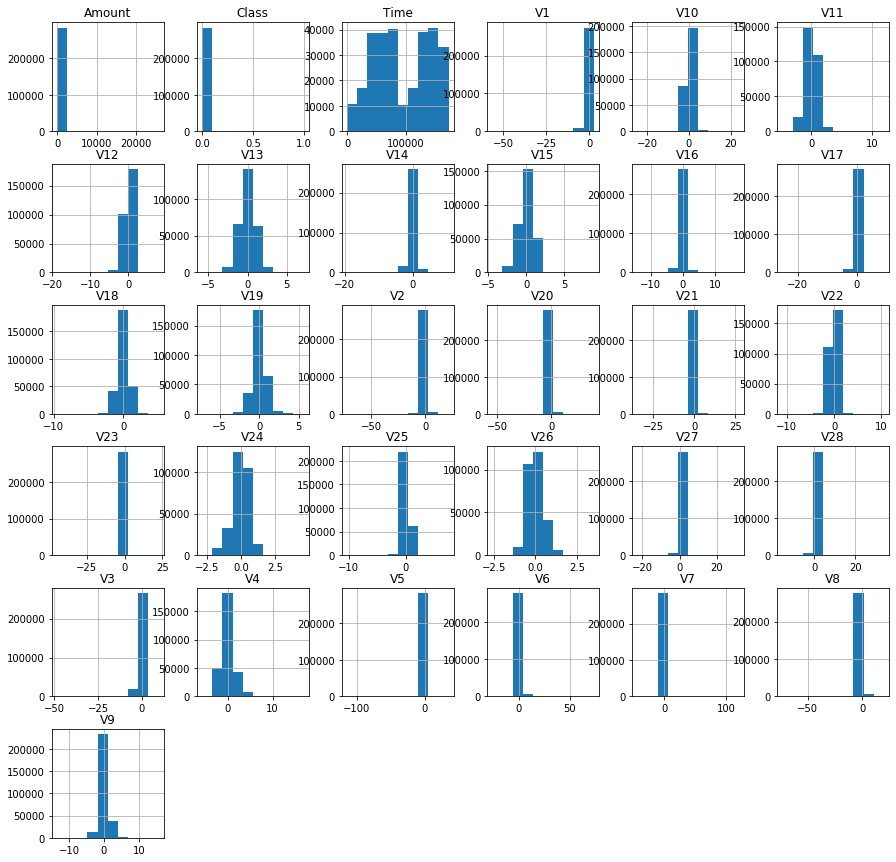

In [9]:
dataset.hist(figsize=(15,15))
plt.show()

**6. Построить матрицу корреляций для всех значений**

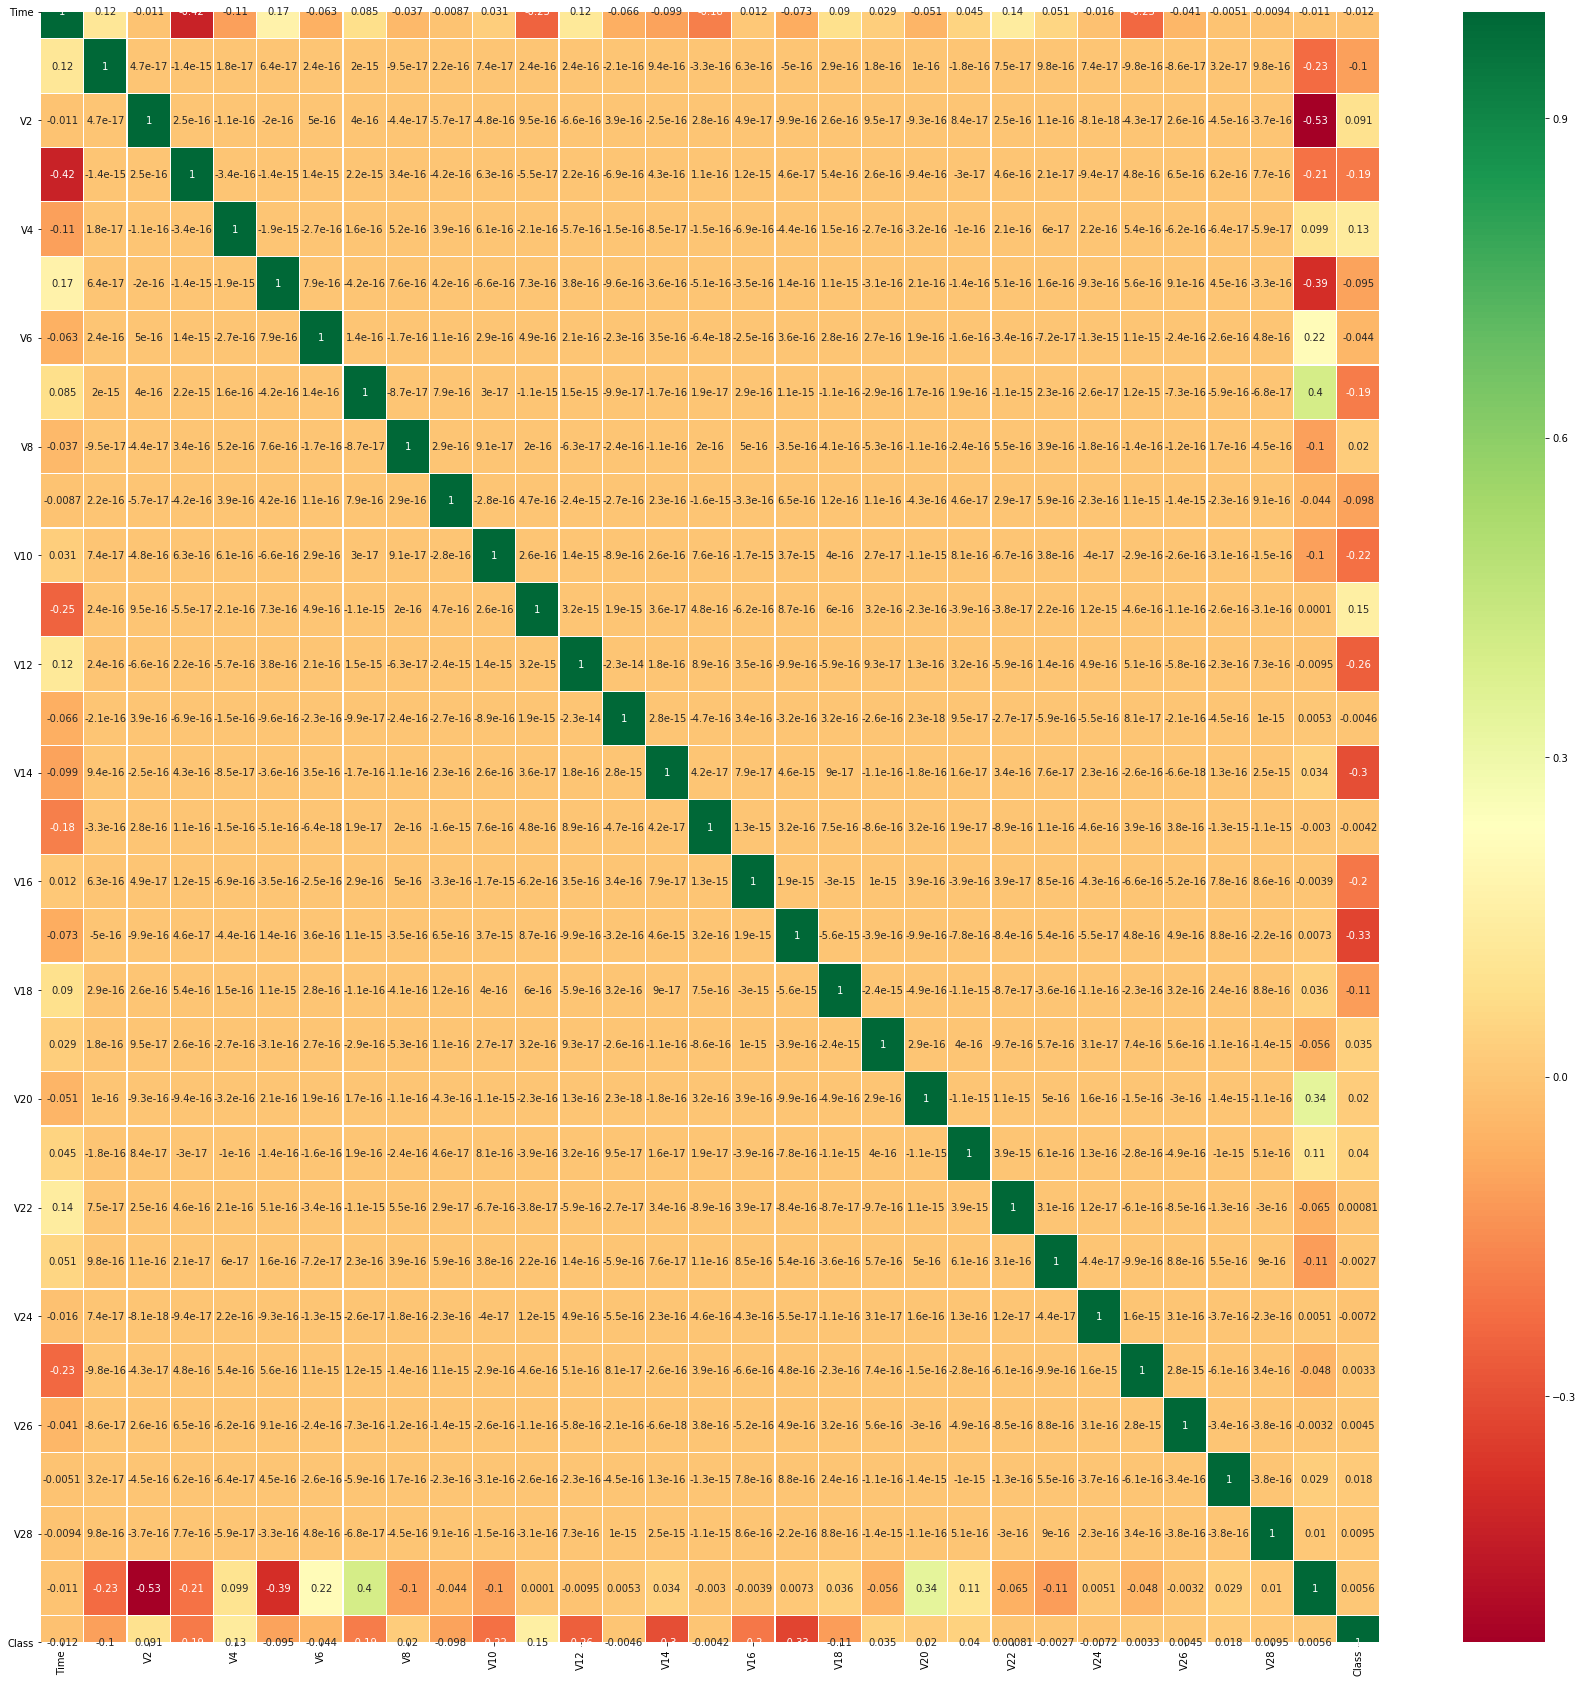

In [10]:
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(30,30)
plt.show()

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

In [11]:
data = dataset.iloc[:,:-1]

In [12]:
df = dataset.iloc[:,-1]
df = pd.DataFrame(df)
df['Legitimate'] = df.apply(lambda x: 1 if x['Class']==0 else 0, axis=1)
df['Fraud'] = df.apply(lambda x: 1 if x['Class']==1 else 0, axis=1)
df = df.drop('Class', axis=1)
df

,Legitimate,Fraud
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
284802,1,0
284803,1,0
284804,1,0
284805,1,0


In [13]:
input_x1 = data
output_y1 = df

In [14]:
le = LabelEncoder()
targets = (output_y1.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y = le.fit_transform(targets)

Legitimate    284315
Fraud            492
dtype: int64


In [15]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(input_x1, Y, test_size=0.3)

In [16]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_1,y_train_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
model_pred1 = model.predict(X_test_1)

print(classification_report(y_test_1, model_pred1))

model.score(X_test_1, y_test_1)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       131
           1       1.00      1.00      1.00     85312

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



0.9995669627705019

In [45]:
# Слишком точный результат для неромализованной выборки. Не понимаю что могло пойти не так... 

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [19]:
data = dataset.iloc[:,:-1]
headers = list(data.columns.values)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(data)
dataset_norm = pd.DataFrame(np_scaled)

dataset_norm.columns = headers
dataset_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [20]:
input_x2 = dataset_norm
output_y2 = df

In [21]:
le = LabelEncoder()
targets = (output_y2.iloc[:,:]==1).idxmax(1)
print(targets.value_counts())
Y = le.fit_transform(targets)

Legitimate    284315
Fraud            492
dtype: int64


In [22]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(input_x2, Y, test_size=0.3)

Модель Random Forest

In [23]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_2,y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Как делать classification report:

In [24]:
model_pred2 = model.predict(X_test_2)

print(classification_report(y_test_2, model_pred2))

model.score(X_test_2, y_test_2)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       162
           1       1.00      1.00      1.00     85281

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



0.9995786664794073

In [ ]:
# Может быть для нормализованных данных такая точность и нормальна

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train_1, y_train_1)
X_resampled, Y_resampled = ros.fit_sample(X_train_1, y_train_1)
print('Количество элементов до операции:', len(X_train_1))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398006


In [30]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 199003, 1: 199003}

In [31]:
unique, counts = np.unique(y_test_1, return_counts=True)
dict(zip(unique, counts))

{0: 131, 1: 85312}

In [32]:
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_resampled, Y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
model_pred3 = model.predict(X_test_1)

print(classification_report(y_test_1, model_pred3))

model.score(X_test_1, y_test_1)

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       131
           1       1.00      1.00      1.00     85312

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



0.9995786664794073